In [1]:
import pandas as pd
import sqlite3
import matplotlib
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [94]:
df = pd.read_csv('/Users/sofiakramarova/Desktop/Education/HWR/Data Warehousing/smoking.csv')
print(df)

     outcome smoker  age
0      Alive    Yes   23
1      Alive    Yes   18
2       Dead    Yes   71
3      Alive     No   67
4      Alive     No   64
...      ...    ...  ...
1309   Alive    Yes   35
1310   Alive     No   33
1311   Alive    Yes   21
1312   Alive     No   46
1313   Alive    Yes   41

[1314 rows x 3 columns]


In [53]:
df.info

<bound method DataFrame.info of      outcome smoker  age
0      Alive    Yes   23
1      Alive    Yes   18
2       Dead    Yes   71
3      Alive     No   67
4      Alive     No   64
...      ...    ...  ...
1309   Alive    Yes   35
1310   Alive     No   33
1311   Alive    Yes   21
1312   Alive     No   46
1313   Alive    Yes   41

[1314 rows x 3 columns]>

In [5]:
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [6]:
df.shape

(1314, 3)

In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head(1)

,age
0,23


In [8]:
df_num.head()

,age
0,23
1,18
2,71
3,67
4,64


In [9]:
df.isnull().sum()

outcome    0
smoker     0
age        0
dtype: int64

In [11]:
training=pd.get_dummies(df, columns=["smoker"])
training.drop('outcome', axis=1, inplace=True)
#training.drop('smoker', axis=1, inplace=True)

final_train = training
final_train.head()

,age,smoker_No,smoker_Yes
0,23,0,1
1,18,0,1
2,71,0,1
3,67,1,0
4,64,1,0


In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1309     True
1310     True
1311     True
1312     True
1313     True
Length: 1314, dtype: bool

In [25]:
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outcome  1314 non-null   object 
 1   smoker   0 non-null      float64
 2   age      1314 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 30.9+ KB


In [48]:
spearmanr(df.smoker, df.outcome)

SpearmanrResult(correlation=-0.010520436038902342, pvalue=0.7032000287730781)

In [97]:
smoke = {"No" : 0, "Yes" : 1}
df["smoker"] = df["smoker"].map(smoke)

In [95]:
outcome = {"Dead" : 0, "Alive" : 1}
df["outcome"] = df["outcome"].map(outcome)

In [98]:
df.head()

,outcome,smoker,age
0,1,1,23
1,1,1,18
2,0,1,71
3,1,0,67
4,1,0,64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


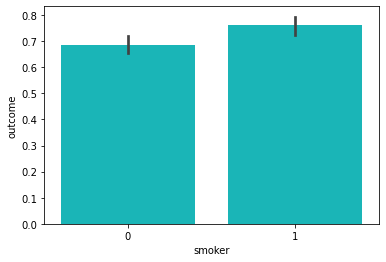

In [100]:
sns.barplot('smoker', 'outcome', data=df, color="darkturquoise")
plt.show()

In [103]:
spearmanr(df.outcome, df.smoker)

SpearmanrResult(correlation=0.08331462328492742, pvalue=0.0025072507746804174)

In [104]:
import networkx as nx


In [106]:
graph = nx.DiGraph()
graph.add_edges_from([("smoker", "outcome")])
graph.nodes()

NodeView(('smoker', 'outcome'))

In [107]:
nx.shortest_path(graph, 'smoker', 'outcome')

['smoker', 'outcome']

In [108]:
nx.is_directed(graph)

True

In [109]:
nx.is_directed_acyclic_graph(graph)

True

In [112]:
g2 = nx.DiGraph()
g2.add_edges_from([("smoker", "outcome")])
plt.tight_layout()
nx.draw_networkx(g2, arrows=True)
plt.savefig("g2.png", format="PNG")
plt.clf()

NetworkXError: random_state_index is incorrect

<Figure size 432x288 with 0 Axes>

In [113]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

print(df)

      outcome  smoker  age agerange
0           1       1   23    18-29
1           1       1   18    18-29
2           0       1   71      70+
3           1       0   67    60-69
4           1       0   64    60-69
...       ...     ...  ...      ...
1309        1       1   35    30-39
1310        1       0   33    30-39
1311        1       1   21    18-29
1312        1       0   46    40-49
1313        1       1   41    40-49

[1314 rows x 4 columns]


In [124]:
import networkx as nx

In [131]:
G = nx.Graph()

In [136]:
G = nx.from_pandas_edgelist(df, 'smoker', 'agerange')

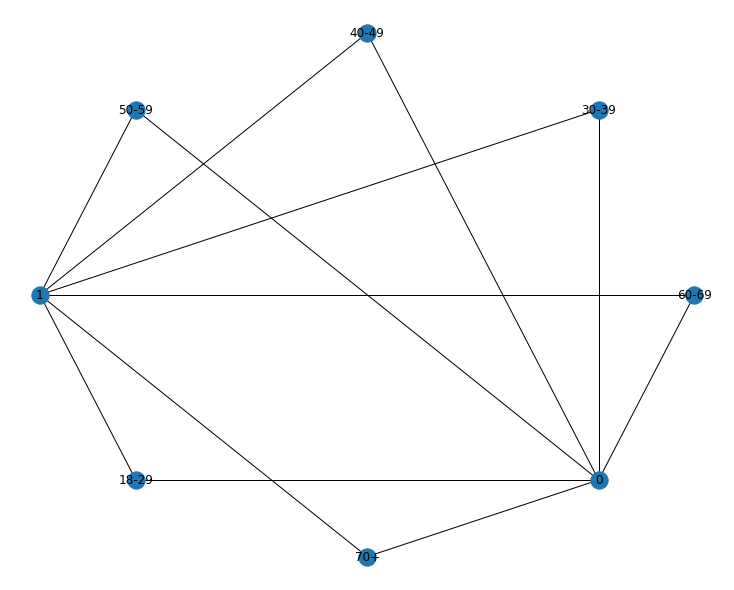

In [137]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [138]:
leaderboard = {}
for x in G.nodes:
 leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [139]:
df2.head()

,connections
1,6
0,6
18-29,2
70+,2
60-69,2
